In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [7]:
def divv(Vx, Vy, stepsize):
    dvx_dx = np.gradient(Vx, axis=0, edge_order = 2)/stepsize
    dvy_dy = np.gradient(Vy, axis=1, edge_order = 2)/stepsize

    DIV = dvx_dx + dvy_dy
    return DIV

def rotorr(Vx, Vy, stepsize):
    dvx_dy = np.gradient(Vx, axis=1, edge_order = 2)/stepsize
    dvy_dx = np.gradient(Vy, axis=0, edge_order = 2)/stepsize

    ROTOR = dvy_dx - dvx_dy
    return (ROTOR)

<h2>MURaM velocities</h2>

In [8]:
Vxm1 = fits.open("Velocities_TAU_0_100.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_100.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
#Vxm2 = Vxm2.transpose(0, 2, 1)
#Vym2 = Vym2.transpose(0, 2, 1)

In [9]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2[::3,::2,::2]/1E5
Vym2 = Vym2[::3,::2,::2]/1E5
#Vxm2 = Vxm2.transpose(0, 2, 1)
#Vym2 = Vym2.transpose(0, 2, 1)

In [10]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [11]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5/2, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5/2, mode = "wrap")

In [12]:
Vxm1_filtered300 = gaussian_filter(Vxm1_mean, 11.25/2, mode = "wrap")
Vym1_filtered300 = gaussian_filter(Vym1_mean, 11.25/2, mode = "wrap")

In [13]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
#Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
#Vym2_mean = Vym2_mean/1E5

In [14]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5/2, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5/2, mode = "wrap")

In [15]:
Vxm2_filtered300 = gaussian_filter(Vxm2_mean, 11.25/2, mode = "wrap")
Vym2_filtered300 = gaussian_filter(Vym2_mean, 11.25/2, mode = "wrap")

In [16]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3[::3,::2,::2]/1E5
Vym3 = Vym3[::3,::2,::2]/1E5
#Vxm3 = Vxm3.transpose(0, 2, 1)
#Vym3 = Vym3.transpose(0, 2, 1)

In [17]:
Vxm4 = fits.open("Velocities_TAU_0_0001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym4 = fits.open("Velocities_TAU_0_0001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm4 = Vxm4[::3,::2,::2]/1E5
Vym4 = Vym4[::3,::2,::2]/1E5
#Vxm4 = Vxm4.transpose(0, 2, 1)
#Vym4 = Vym4.transpose(0, 2, 1)

In [18]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [19]:
Vxm4_mean = temporal_avg(Vxm4, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym4_mean = temporal_avg(Vym4, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [20]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5/2, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5/2, mode = "wrap")

In [21]:
Vxm3_filtered300 = gaussian_filter(Vxm3_mean, 11.25/2, mode = "wrap")
Vym3_filtered300 = gaussian_filter(Vym3_mean, 11.25/2, mode = "wrap")

In [22]:
Vxm4_filtered600 = gaussian_filter(Vxm4_mean, 22.5/2, mode = "wrap")
Vym4_filtered600 = gaussian_filter(Vym4_mean, 22.5/2, mode = "wrap")

In [23]:
Vxm4_filtered300 = gaussian_filter(Vxm4_mean, 11.25/2, mode = "wrap")
Vym4_filtered300 = gaussian_filter(Vym4_mean, 11.25/2, mode = "wrap")

<h2>Milne-Eddington Fe I</h2>

In [24]:
Vx_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[1].data.transpose(0, 2, 1)

In [25]:
Vx_BzFeI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")

In [26]:
Vx_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[1].data.transpose(0, 2, 1)

In [27]:
Vx_BzFeI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")

<h2>Weak-field Approximation Mg I b2</h2>

In [28]:
Vx_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[1].data.transpose(0, 2, 1)

In [29]:
Vx_BzMgI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")

In [30]:
Vx_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[1].data.transpose(0, 2, 1)

In [31]:
Vx_BzMgI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")

<h3>Make a video that shows change of $V_x$ from MURaM and $V_x$ that results from tracking $B_z$ gotten through inversion</h3>

In [32]:
import glob
import os
import imageio.v3 as iio
import imageio
from PIL import ImageFont, ImageDraw, Image
from tqdm import tqdm

In [33]:
def make_video_from_frames(image_dir="/home/mistflow/Documents/ISSI_2D", output_video="/home/mistflow/Documents/ISSI_2D/muram_movie.mp4", fps=5, iter1=0):
    """
    Create an MP4 video using FFmpeg backend with correct format enforcement.

    Parameters:
    -----------
    image_dir : str
        Directory with JPG frames (e.g., tauz_*.jpg).
    output_video : str
        Path to save the MP4 video.
    fps : int
        Frames per second.
    iter1 : int
        Start iteration (optional, unused).
    """
    jpg_files = []
    for file in sorted(os.listdir(os.getcwd())):
        if file.startswith("Proba"):
            jpg_files.append(file)
    #jpg_files = sorted(glob.glob(os.path.join(image_dir, "Proba_*.jpg")))
    print(jpg_files)
    if not jpg_files:
        print("❌ No JPG frames found.")
        return None

    # Explicitly force ffmpeg backend
    writer = imageio.get_writer(
        output_video,
        format='FFMPEG',
        mode='I',
        fps=fps,
        codec='libx264'
    )

    for filename in jpg_files:
        img = imageio.imread(filename)
        writer.append_data(img)

    writer.close()
    print(f"🎞️ Video saved to {output_video}")
    return output_video

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [09:44<00:00, 19.47s/it]


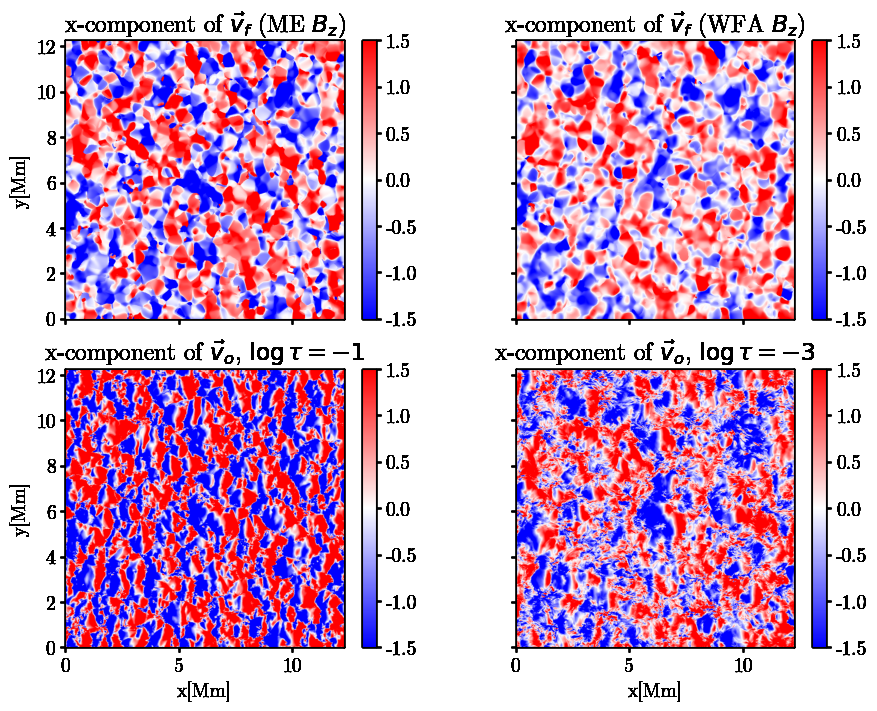

In [37]:
f = plt.figure(constrained_layout=True, figsize = (9,7))
start = 0
for j in tqdm(range(len(Vx_ME_FeI))):
    snapshot = start + j*150
    ax1 = f.add_subplot(221)
    ax1.set_title("x-component of $\\vec{v}_f$ (ME $B_z$)")
    #ax1.set_xlabel("x[Mm]")
    ax1.set_ylabel("y[Mm]")
    ax1.set_xticklabels([])
    im1 = ax1.imshow(Vx_ME_FeI[j, :, :].T, origin='lower', cmap = "bwr", extent = (0, 12.268, 0, 12.268), vmin = -1.5, vmax = 1.5)
    plt.colorbar(im1)
    
    #ax2 = plt.subplot2grid((4,3), (0,1))
    ax2 = f.add_subplot(223)
    ax2.set_title("x-component of $\\vec{v}_o$, $\log\\tau = -1$")
    ax2.set_xlabel("x[Mm]")
    ax2.set_ylabel("y[Mm]")
    im2 = ax2.imshow(Vxm1[j, :, :].T, origin='lower', cmap = "bwr", extent = (0, 12.268, 0, 12.268), vmin = -1.5, vmax = 1.5)
    plt.colorbar(im2)
    '''
    #ax3 = plt.subplot2grid((4,3), (0,2))
    ax3 = f.add_subplot(325)
    ax3.set_title("Linear fit for FWHM = 600 km")                                
    ax3.set_ylabel("x-component of $\\vec{v}_f$ [km/s]")
    ax3.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")
    #ax3.scatter(Vxm1_filtered600.flatten(), Vx_BzFeI_cor.flatten(), s = 0.01, alpha = 0.05, color="red")
    
    df = pd.DataFrame(dict(x = Vxm1[j].flatten(), y = Vx_ME_FeI[j].flatten()))
    dsartist = dsshow(
            df,
            ds.Point("x", "y"),
            ds.count(),
            #vmin=np.min(z),
            #vmax=np.max(z),
            alpha = 0.7,
            norm="linear",
            aspect="equal",
            ax=ax3,
            cmap = "PuBuGn_r",
            x_range = (-4,4),
            y_range = (-4,4)
        )
    
    plt.colorbar(dsartist)
    m1, b1, *_ = linregress(Vxm1[j].flatten(), Vx_ME_FeI[j].flatten())
    ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
    ax3.plot([0,1],[0,1], linestyle='dotted', color='k', transform=ax3.transAxes, label = "y = x")
    ax3.set_xlim(-4.0, 4.0)
    ax3.set_ylim(-4.0, 4.0)
    plt.legend(fontsize = 10, loc = "best")
    '''
    #ax4 = plt.subplot2grid((4,3), (1,0))
    ax4 = f.add_subplot(222)
    ax4.set_title("x-component of $\\vec{v}_f$ (WFA $B_z$)")
    #ax4.set_xlabel("x[Mm]")
    #ax4.set_ylabel("y[Mm]")
    ax4.set_xticklabels([])
    ax4.set_yticklabels([])
    im4 = ax4.imshow(Vx_ME_MgI[j, :, :].T, origin='lower', cmap = "bwr", extent = (0, 12.268, 0, 12.268), vmin = -1.5, vmax = 1.5)
    plt.colorbar(im4)
    
    #ax5 = plt.subplot2grid((4,3), (1,1))
    ax5 = f.add_subplot(224)
    ax5.set_title("x-component of $\\vec{v}_o$, $\log\\tau = -3$")
    ax5.set_xlabel("x[Mm]")
    #ax5.set_ylabel("y[Mm]")
    ax5.set_yticklabels([])
    im5 = ax5.imshow(Vxm3[j, :, :].T, origin='lower', cmap = "bwr", extent = (0, 12.268, 0, 12.268), vmin = -1.5, vmax = 1.5)
    plt.colorbar(im5)
    '''
    #ax6 = plt.subplot2grid((4,3), (1,2))
    ax6 = f.add_subplot(326)
    ax6.set_title("Linear fit for FWHM = 300 km")                                
    #ax6.set_ylabel("FLCT Vx[km/s]")
    ax6.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")
    #ax6.scatter(Vxm1_filtered300.flatten(), Vx_BzFeI_cor3.flatten(), s = 0.01, alpha = 0.05, color="red")
    
    df1 = pd.DataFrame(dict(x = Vxm1[j].flatten(), y = Vx_ME3_FeI[j].flatten()))
    dsartist1 = dsshow(
            df1,
            ds.Point("x", "y"),
            ds.count(),
            #vmin=np.min(z),
            #vmax=np.max(z),
            alpha = 0.7,
            norm="linear",
            aspect="equal",
            ax=ax6,
            cmap = "PuBuGn_r",
            #cmap = "inferno"
            x_range = (-4,4),
            y_range = (-4,4)
        )
    
    m2, b2, *_ = linregress(Vxm1[j].flatten(), Vx_ME3_FeI[j].flatten())
    ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
    ax6.plot([0,1],[0,1], linestyle='dotted', color='k', transform=ax6.transAxes, label = "y = x")
    plt.colorbar(dsartist1)
    ax6.set_xlim(-4.0, 4.0)
    ax6.set_ylim(-4.0, 4.0)
    plt.legend(fontsize = 10, loc='best')
    '''
    plt.savefig("Proba"+str(snapshot)+".jpg", dpi = 70)

In [43]:
video = make_video_from_frames(image_dir="ISSI_2D", output_video="/home/mistflow/Documents/ISSI_2D/Our_movie.mp4", fps=3)

/tmp/ipykernel_74308/47085376.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (630, 490) to (640, 496) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['Proba0.jpg', 'Proba1050.jpg', 'Proba1200.jpg', 'Proba1350.jpg', 'Proba150.jpg', 'Proba1500.jpg', 'Proba1650.jpg', 'Proba1800.jpg', 'Proba1950.jpg', 'Proba2100.jpg', 'Proba2250.jpg', 'Proba2400.jpg', 'Proba2550.jpg', 'Proba2700.jpg', 'Proba2850.jpg', 'Proba300.jpg', 'Proba3000.jpg', 'Proba3150.jpg', 'Proba3300.jpg', 'Proba3450.jpg', 'Proba3600.jpg', 'Proba3750.jpg', 'Proba3900.jpg', 'Proba4050.jpg', 'Proba4200.jpg', 'Proba4350.jpg', 'Proba450.jpg', 'Proba600.jpg', 'Proba750.jpg', 'Proba900.jpg']


[swscaler @ 0x5db55f57c800] Warning: data is not aligned! This can lead to a speed loss


🎞️ Video saved to /home/mistflow/Documents/ISSI_2D/Our_movie.mp4
